## This is the introductory example for the pyioflash library

First we need to import the necessary python modules for this example and set matplotlib to inline for the notebook

In [1]:
from sys import stdout
import numpy
from matplotlib import pyplot, colorbar, cm, colors, animation
from IPython.display import HTML

We need to import the necessary packages from the pyioflash library.

In this case we will need the main data analysis package which provides the basic utilites necessary to manage simulation output data

In [2]:
from pyioflash import SimulationData

Now we need to read the flash simulation output into a data object    
    
    How it works:
    
        *if the files to be processed were*:
            - data/INS_Rayleigh_hdf5_plt_cnt_0000
            - data/INS_Rayleigh_hdf5_plt_cnt_0001
            - data/INS_Rayleigh_hdf5_plt_cnt_0002
                        ...
            - data/INS_Rayleigh_hdf5_plt_cnt_0020                        
        
        *the following would be the values for attributes*:
            - first argument is [0, 1, 2, ... 20]
            - path = 'data/'
            - basename = 'INS_Rayleigh_'
            - header = 'hdf5_plt_cnt_'
            - footer = ''
            - extension = ''
            - numform = '04d'
            
For this example many of the attributes may be taken as their defaults and the call would look like this

In [3]:
data = SimulationData.from_list(range(21), path='data/', basename='INS_Rayleigh_', header='hdf5_plt_cnt_')


############    Building SImulationData Object   ############

Processing metadata from: data/INS_Rayleigh_hdf5_plt_cnt_0000
Reading Grid from File
Processing file: data/INS_Rayleigh_hdf5_plt_cnt_0020

#############################################################




What we have now is a data structure to store and an api to process hdf5 output files.

    When a SimulationData instance is created, the provided hdf5 files are opened, read into
    memory, and subsequently closed. The init method provides this functionality by instanciating
    the relavent empty collections (as composite objects) and subsequently calling the appropriate
    import method (e.g., __read_flash4__).::
    
        from pyio import SimulationData
        data = SimulationData.from_list(range(20), path='../out/',
                                        basename='INS_Rayleigh_', header='hdf5_plt_cnt_')
        data.fields[20.0 : 60.0 : 2]['temp', 'pres'][:, :, :, :, :]
        
        
    The basic usage of the class is as follows: (1) import the class from the package, (2) create an instance
    of the class by providing the necessary specification for the hdf5 output files, and (3) use the class
    instance data members in a natural way (e.g., slicing and computations work as expected if you are
    familure with either numpy or matlab indexing).
    
    The general format for accessing the geometry, field, or scalar data is::
        instance.member[times or indicies]['name', ...][indicies, blocks, z(s), y(s), x(s)]
        
    The general format for accessing the dynamic data is::
        instance.dynamic[times or indicies]['name', ...][indicies]
        
    The general format for accessing the static data is::
        instance.static['name']
        
    Wherein the above times / indicies / blocks / x(s) are slices in the python or numpy format and the
    ['name', 'name', ...] may be either a single string or a list of srings associated with member names.
     
    
    Attributes:
        files (NameData): list of filenames and paths to be processed
        code (str): flag for the code which produced the output (e.g., flash)
        form (str): flag for the format of the hdf5 output file (e.g., plt)
        geometry (GeometryData): geometry data/information from the processed hdf5 file (first)
        fields (SortedDict): vector and scalar field data from the processed hdf5 files
        scalars (SortedDict): scalar (e.g., time, dt) data from the processed hdf5 files
        dynamics (SortedDict): time varying information from the processed hdf5 files
        statics (StaticData):  non-time varying information from the processed hdf5 files
        utility (Utility): collection of helper methods for extending SimulationData functionality
        

Now lets see a simple task we can do to visualize the grid data from the simulation.

We are going to use data.geometry.grd_mesh_x and data.geometry.grd_mesh_y to make a scatter plot.

    GeometryData is a derived class implementing the functionality to
    read the relavent geometry data contained in the hdf5 output file.
    
    
    Attributes:
        blk_num: total number of blocks in the simulation
        blk_num_x: number of blocks in x direction
        blk_num_y: number of blocks in y direction
        blk_num_z: number of blocks in z direction
        blk_size_x: simulation points of each block in x direction
        blk_size_y: simulation points of each block in y direction
        blk_size_z: simulation points of each block in z direction
        blk_guards: guard cell points of each block in each direction
        blk_coords: coordinates of each block center
        blk_bndbox: bounding box coordinates of each block
        blk_tree_str: tree structure containing block neighbors, parents, and children
        blk_neighbors: list of neighbors for each block
        grd_type: type of grid in the simulation (e.g., uniform or regular)
        grd_dim: dimentionality of the simulation (e.g., 2d or 3d)
        grd_bndbox: bouding box coordinates of the simulation
        grd_mesh_x: mesh data for block data, in x direction
        grd_mesh_x_max: max of mesh data, in x direction
        grd_mesh_x_min: min of mesh data, in x direction
        grd_mesh_y: mesh data for block data, in y direction
        grd_mesh_y_max: max of mesh data, in y direction
        grd_mesh_y_min: min of mesh data, in y direction
        grd_mesh_z: mesh data for block data, in z direction
        grd_mesh_z_max: max of mesh data, in z direction
        grd_mesh_z_min: min of mesh data, in z direction
        grd_mesh_ddx: mesh metric data for block data, in x direction
        grd_mesh_ddx_max: max of mesh metric data, in x direction
        grd_mesh_ddx_min: min of mesh metric data, in x direction
        grd_mesh_ddy: mesh metric data for block data, in y direction
        grd_mesh_ddy_max: max of mesh metric data, in y direction
        grd_mesh_ddy_min: min of mesh metric data, in y direction
        grd_mesh_ddz: mesh metric data for block data, in z direction
        grd_mesh_ddz_max: max of mesh metric data, in z direction
        grd_mesh_ddz_min: min of mesh metric data, in z direction
        
        
    Note:
        The grid mesh data attributes return mesh coordinate data for each block
        without filling in relavent guard cell neighbor data; if this data is
        desired, the attribute name should be prepended with an underscore.



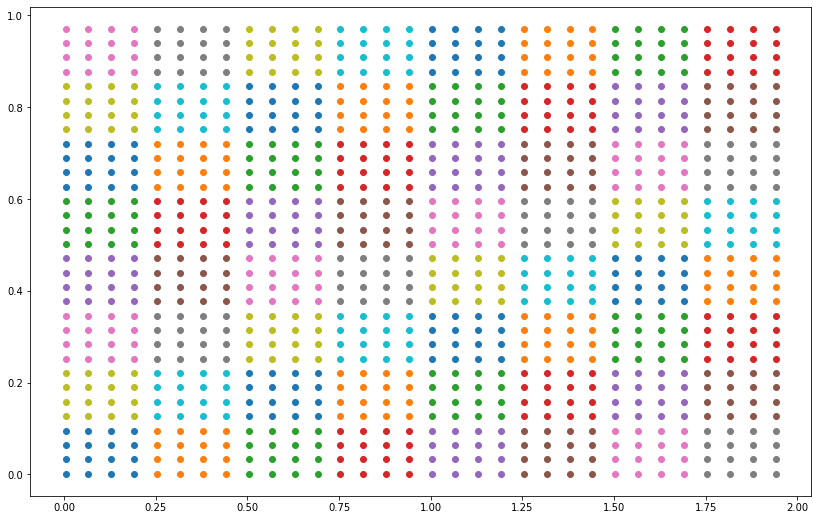

In [4]:
# Let's import the necessary grid data
xx, yy = data.geometry.grd_mesh_x[1,:,0,:,:], data.geometry.grd_mesh_y[1,:,0,:,:]

# There is alot of data so lets only plot every 8th
skp = 8

# Now let's plot the scatter data one block at a time
fig, ax = pyplot.subplots(figsize=(14, 9))
for x, y in zip(xx, yy):
    ax.scatter(x[::skp,::skp], y[::skp,::skp])

Now lets try to do a simple contour plot of the temperature field at the end of the simulation

    Remember the field objects have the following indices in general -- [time, blocks, z, y, x]
                                 with geometry data similarly having -- [face, blocks, z, y, x]

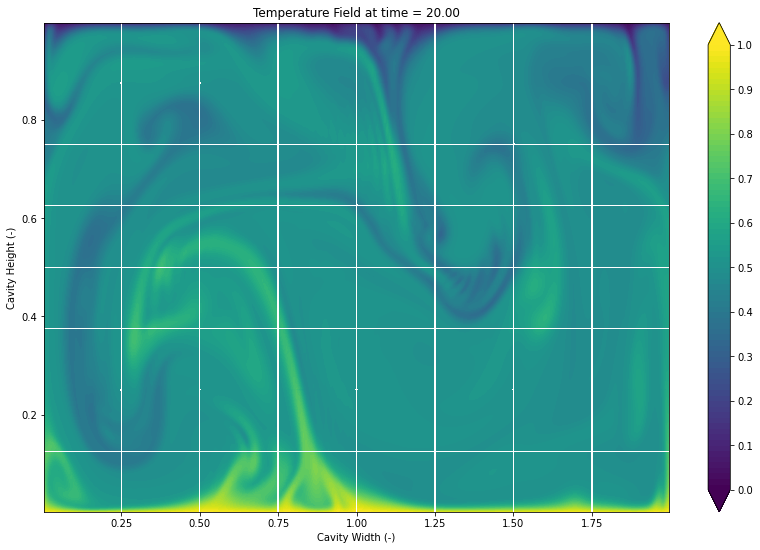

In [5]:
# Let's import the needed grid and field data from our simulation object
times, = data.scalars['t']
xx, yy = data.geometry.grd_mesh_x[1, :, 0, :, :], data.geometry.grd_mesh_y[1, :, 0, :, :]
T,  = data.fields['temp'][-1, :, 0, :, :]

# Let's set some limits and color information
fmin, fmax = 0.0, 1.0
lvls = numpy.linspace(fmin, fmax, 81)
cmap = cm.viridis
norm = colors.Normalize(vmin=fmin, vmax=fmax)

# Now let's plot the contour one block at a time
fig, ax = pyplot.subplots(figsize=(14, 9))
for x, y, z in zip(xx, yy,  T):
    cax = ax.contourf(x, y, z, lvls, vmin=fmin, vmax=fmax, norm=norm, cmap=cmap, extend='both')
    
# lets add some labeling to the plot
fig.colorbar(cax, ax=ax, ticks=lvls[::8])
ax.set_title('Temperature Field at time = %0.2f' % (times[-1]))
ax.set_xlabel('Cavity Width (-)')
ax.set_ylabel('Cavity Height (-)');    

Well that was an interesting result. 

The issue is that by accessing the geometry and field data with .grd_mesh_x and 'temp', respectivly, we are not getting the guard cell data and when we plot a cell-centered field one block at a time we miss the strips in-between the blocks.

Lets try this again but this time we will use the geometry and field data with guard cells using a leading underscore.

Additionally, lets' add some flair by also making a quiver plot from the u and v velocity date. 
    
    Note that we will have to move the face-centered velocity data to the cell-centers

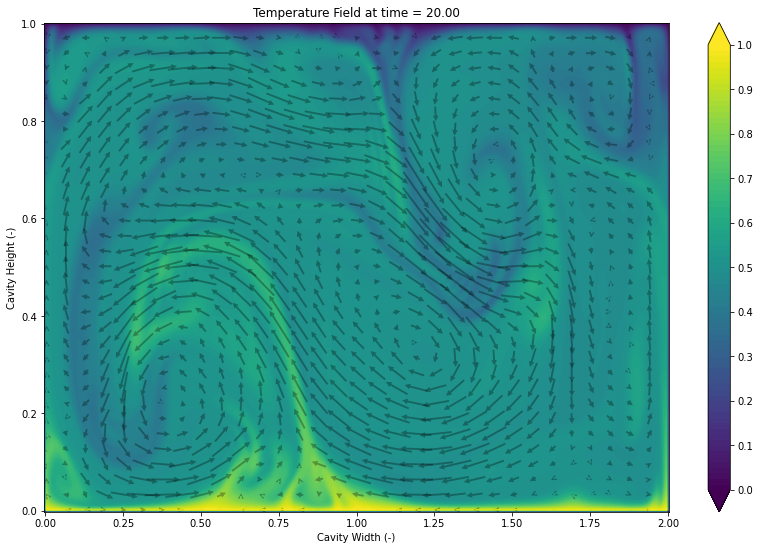

In [9]:
# Let's import the needed grid and field data from our simulation object
times, = data.scalars['t']
xx, yy = data.geometry._grd_mesh_x[1, :, 1, :, :], data.geometry._grd_mesh_y[1, :, 1, :, :]
u, v, T = data.fields['_fcx2', '_fcy2', '_temp'][-1, :, 1, :, :]

# Let's move the face data to the cell centers
u = (u[:, 1:-1, 1:-1] + u[:, :-2, 1:-1]) / 2
v = (v[:, 1:-1, 1:-1] + v[:, 1:-1, :-2]) / 2

# There is alot of data so lets only plot every 8th
skp = 8

# Let's set some limits and color information
fmin, fmax = 0.0, 1.0
lvls = numpy.linspace(fmin, fmax, 81)
cmap = cm.viridis
norm = colors.Normalize(vmin=fmin, vmax=fmax)

# Let's set some options to make the quiver look nice
options = {'pivot': 'middle', 'minshaft': 0.2, 'minlength': 0.3, 
           'headlength': 3, 'headaxislength': 3, 'headwidth': 3, 
           'scale': 8, 'alpha': 0.3, 'width': 0.003, 'linestyle': 'solid', 'color': 'black'}

# Now let's plot the contour and quiver one block at a time
fig, ax = pyplot.subplots(figsize=(14, 9))
for x, y, i, j, z in zip(xx, yy,  u, v, T):
    cax = ax.contourf(x, y, z, lvls, vmin=fmin, vmax=fmax, norm=norm, cmap=cmap, extend='both')
    ax.quiver(x[1:-1:skp,1:-1:skp], y[1:-1:skp,1:-1:skp], i[::skp,::skp], j[::skp,::skp], **options)

# lets add some labeling to the plot
fig.colorbar(cax, ax=ax, ticks=lvls[::8])
ax.set_title('Temperature Field at time = %0.2f' % (times[-1]))
ax.set_xlabel('Cavity Width (-)')
ax.set_ylabel('Cavity Height (-)');

Now to conlude this example, let's make a simple animation of the temperature data.

In [7]:
%%capture

# Let's import the necessary field data
times, = data.scalars['t']
xx, yy = data.geometry._grd_mesh_x[1, :, 1, :, :], data.geometry._grd_mesh_y[1, :, 1, :, :]
T_time, = data.fields['_temp'][:, :, 1, :, :]

# Let's set some limits and color information
fmin, fmax = 0.0, 1.0
cmap = cm.viridis
norm = colors.Normalize(vmin=fmin, vmax=fmax)

# Make figure and axis
fig, ax = pyplot.subplots(figsize=(14, 9))
ax.set(xlim=(0.0, 2.0), ylim=(0.0, 1.0))

# Initialize the first frame and plot objects
cax = {}
for b, (x, y, z) in enumerate(zip(xx, yy, T_time[0, :, :, :])):
    cax[b] = ax.pcolormesh(x, y, z, vmin=fmin, vmax=fmax, norm=norm, cmap=cmap, 
                          antialiased=False, shading='gouraud')
fig.colorbar(cax[0], ax=ax)
ax.set_xlabel('Cavity Width (-)')
ax.set_ylabel('Cavity Height (-)')


# Make a animate frame function
def animate(step):
    for b, z in enumerate(T_time[step, :, :, :]):
        stdout.write("Processing animation at step %d \r" % (step))
        stdout.flush()

        cax[b].set_array(z.ravel())
        ax.set_title('Temperature Field at time = %5.2f' % (times[step]))

# Finaly, create the animation object
anim = animation.FuncAnimation(fig, animate, frames=range(21), interval=300, blit=False)

In [8]:
# Let's view the animation
HTML(anim.to_html5_video())